In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams["figure.figsize"]=(10,6)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [6]:
data=pd.read_csv("train_ver2.csv",nrows=7e6)

data.info()

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_6456/2748994526.py:1: DtypeWarning: Columns (5,8,10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("train_ver2.csv",nrows=7e6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta             

In [10]:
#unique_ids

unique_id=pd.Series(data["ncodpers"].unique())
unique_id=unique_id.sample(n=130000)
data_unique_id=data[data.ncodpers.isin(unique_id)]

In [11]:
data_unique_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007354 entries, 0 to 6999981
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   fecha_dato             1007354 non-null  object 
 1   ncodpers               1007354 non-null  int64  
 2   ind_empleado           1003301 non-null  object 
 3   pais_residencia        1003301 non-null  object 
 4   sexo                   1003281 non-null  object 
 5   age                    1007354 non-null  object 
 6   fecha_alta             1003301 non-null  object 
 7   ind_nuevo              1003301 non-null  float64
 8   antiguedad             1007354 non-null  object 
 9   indrel                 1003301 non-null  float64
 10  ult_fec_cli_1t         1555 non-null     object 
 11  indrel_1mes            992243 non-null   object 
 12  tiprel_1mes            992243 non-null   object 
 13  indresi                1003301 non-null  object 
 14  indext                 

In [13]:
data_unique_id['ncodpers'].count()

np.int64(1007354)

In [17]:
#change datatype 
data_unique_id['age']=pd.to_numeric(data_unique_id['age'],errors='coerce')
data_unique_id['antiguedad']=pd.to_numeric(data_unique_id['antiguedad'],errors='coerce') # cutomer seniority
data_unique_id['indrel_1mes']=pd.to_numeric(data_unique_id['indrel_1mes'],errors='coerce') # customer type 
data_unique_id['sexo'] = data_unique_id['sexo'].astype(str) # gender 
data_unique_id['ind_nuevo'] = data_unique_id['ind_nuevo'].astype(str) #New customer index
data_unique_id['ult_fec_cli_1t'] = pd.to_datetime(data_unique_id['ult_fec_cli_1t'],errors="coerce") #last date as primary customer
data_unique_id['indext'] = data_unique_id['indext'].astype(str) #foreginer index


/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_6456/3707300375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique_id['age']=pd.to_numeric(data_unique_id['age'],errors='coerce')
/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_6456/3707300375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique_id['antiguedad']=pd.to_numeric(data_unique_id['antiguedad'],errors='coerce') # cutomer seniority
/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_6456/3707300375

In [18]:
data_unique_id.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado                4053
pais_residencia             4053
sexo                           0
age                         4053
fecha_alta                  4053
ind_nuevo                      0
antiguedad                  4053
indrel                      4053
ult_fec_cli_1t           1005799
indrel_1mes                15147
tiprel_1mes                15111
indresi                     4053
indext                         0
conyuemp                 1007220
canal_entrada              17101
indfall                     4053
tipodom                     4053
cod_prov                    9092
nomprov                     9092
ind_actividad_cliente       4053
renta                     178297
segmento                   17256
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

In [19]:
#droping two column with most null values

df=data_unique_id.drop(['conyuemp','ult_fec_cli_1t'],axis=1)

In [22]:
unique_counts = df.nunique().to_frame(name='unique_count').T
unique_counts


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
unique_count,10,130000,4,71,3,112,6080,3,251,2,4,4,2,3,148,2,1,52,52,2,95388,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [30]:
#filling the income missing value using median method 

median_income_by_province=df.groupby(['nomprov'])['renta'].median()

df["renta"] = df["renta"].fillna(df["nomprov"].map(median_income_by_province))

In [31]:
df.isnull().sum()

fecha_dato                   0
ncodpers                     0
ind_empleado              4053
pais_residencia           4053
sexo                         0
age                       4053
fecha_alta                4053
ind_nuevo                    0
antiguedad                4053
indrel                    4053
indrel_1mes              15147
tiprel_1mes              15111
indresi                   4053
indext                       0
canal_entrada            17101
indfall                   4053
tipodom                   4053
cod_prov                  9092
nomprov                   9092
ind_actividad_cliente     4053
renta                    30553
segmento                 17256
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp_fin_ult1            0
ind_deco_fin_ult1            0
ind_deme

In [32]:
df[df['renta'].isnull()]['nomprov'].unique()

array(['BIZKAIA', nan, 'GIPUZKOA', 'ALAVA'], dtype=object)

In [34]:
df=df.dropna(axis=0)

In [35]:
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23.0,2012-08-10,0.0,35.0,1.0,1.0,I,S,N,KHE,N,1.0,24.0,LEON,0.0,295590.36,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
30,2015-01-28,1050599,N,ES,V,24.0,2012-08-10,0.0,35.0,1.0,1.0,I,S,N,KHE,N,1.0,49.0,ZAMORA,0.0,74780.37,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
36,2015-01-28,1050580,N,ES,H,23.0,2012-08-10,0.0,35.0,1.0,1.0,A,S,N,KHE,N,1.0,27.0,LUGO,1.0,77320.92,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999947,2015-10-28,830178,N,ES,V,68.0,2009-01-30,0.0,81.0,1.0,1.0,A,S,N,KFC,N,1.0,28.0,MADRID,1.0,63591.81,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6999955,2015-10-28,830194,N,ES,H,29.0,2009-01-30,0.0,81.0,1.0,1.0,I,S,N,KGX,N,1.0,28.0,MADRID,0.0,153430.14,02 - PARTICULARES,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6999975,2015-10-28,830113,N,ES,V,69.0,2009-02-24,0.0,81.0,1.0,1.0,I,S,S,KFC,N,1.0,8.0,BARCELONA,0.0,131370.30,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6999979,2015-10-28,830120,N,ES,V,41.0,2009-02-02,0.0,80.0,1.0,1.0,A,S,S,KFA,N,1.0,28.0,MADRID,1.0,139669.89,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [39]:
df['antiguedad'].value_counts()

antiguedad
 12.0        27358
 21.0        24240
 10.0        23625
 23.0        20789
 33.0        20037
 35.0        18869
 9.0         18824
 36.0        18698
 45.0        18638
 24.0        18441
 34.0        17295
 46.0        16508
 22.0        16450
 44.0        14686
 47.0        14152
 11.0        13779
 32.0        13581
 20.0        12228
 8.0         12002
 48.0        11958
 43.0         9756
 13.0         8869
 1.0          8205
 37.0         7415
 25.0         7091
 14.0         6952
 162.0        6946
 164.0        6864
 165.0        6606
 38.0         6250
 2.0          6089
 19.0         5947
 26.0         5928
 161.0        5840
 31.0         5800
 16.0         5760
 163.0        5601
 7.0          5456
 18.0         5407
 15.0         5385
 160.0        5256
 166.0        5044
 81.0         5030
 159.0        4772
 172.0        4717
 3.0          4694
 5.0          4583
 49.0         4582
 168.0        4461
 117.0        4428
 17.0         4303
 6.0          4273
 

In [40]:
df[df['antiguedad']<0]=0

In [41]:
df['antiguedad'].value_counts()

antiguedad
12.0     27358
21.0     24240
10.0     23625
23.0     20789
33.0     20037
35.0     18869
9.0      18824
36.0     18698
45.0     18638
24.0     18441
34.0     17295
46.0     16508
22.0     16450
44.0     14686
47.0     14152
11.0     13779
32.0     13581
20.0     12228
8.0      12002
48.0     11958
43.0      9756
13.0      8869
1.0       8205
37.0      7415
25.0      7091
14.0      6952
162.0     6946
164.0     6864
165.0     6606
38.0      6250
2.0       6089
19.0      5947
26.0      5928
161.0     5840
31.0      5800
16.0      5760
163.0     5601
7.0       5456
18.0      5407
15.0      5385
160.0     5256
166.0     5044
81.0      5030
159.0     4772
172.0     4717
3.0       4694
5.0       4583
49.0      4582
168.0     4461
117.0     4428
17.0      4303
6.0       4273
169.0     4269
105.0     4045
174.0     4035
39.0      3989
171.0     3924
156.0     3907
27.0      3890
173.0     3596
104.0     3559
83.0      3522
170.0     3461
157.0     3455
82.0      3453
119.0     3440

In [43]:
#add a new column of the total number of products per customer accuqired 

df['total_product']=df.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)

df['total_product']=pd.to_numeric(df["total_product"],errors="coerce")

In [45]:
df['pais_residencia'].value_counts()

pais_residencia
ES    963657
0         10
BO        10
PY        10
Name: count, dtype: int64

Text(0, 0.5, 'number of cutomer')

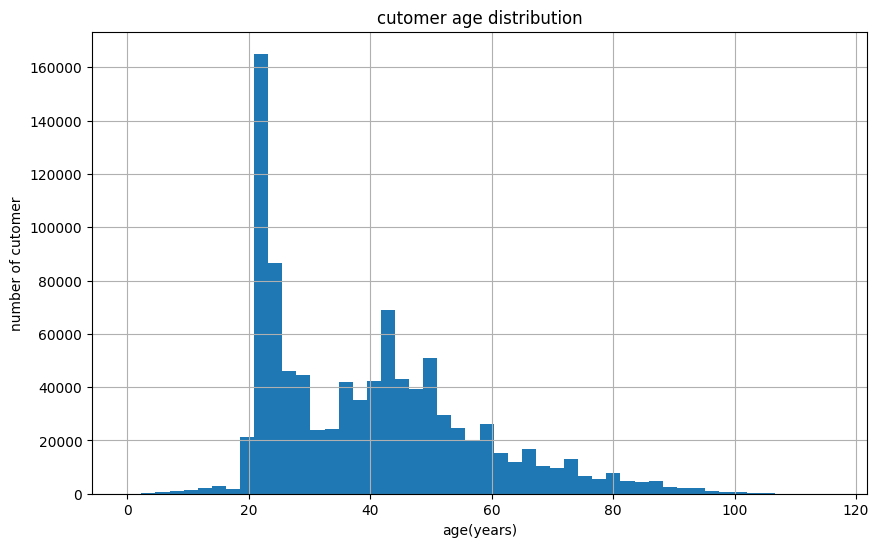

In [47]:
#age distribution

df['age'].hist(bins=50)
plt.title("cutomer age distribution")
plt.xlabel("age(years)")
plt.ylabel("number of cutomer")

In [48]:
#customer joined through a channel

df["canal_entrada"].value_counts().head(10)

canal_entrada
KHE    326567
KAT    244590
KFC    223400
KFA     30387
KHK     16651
KHQ     11043
KHD      9276
KAS      6439
KAG      5494
KAY      5154
Name: count, dtype: int64

<Axes: ylabel='count'>

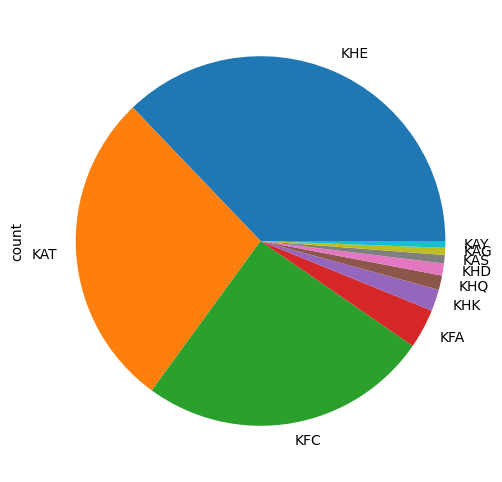

In [49]:

df["canal_entrada"].value_counts().head(10).plot(x=None,y=None,kind='pie')


In [53]:
#activity index & sex & producst

df_a= df.loc[:,['sexo',"ind_actividad_cliente"]].join(df.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"])

In [55]:
df_a=df_a.groupby(['sexo',"ind_actividad_cliente"]).sum()
df_a=df_a.T

In [56]:
df_a

sexo                     0         H                   V             nan
ind_actividad_cliente  0.0       0.0       1.0       0.0       1.0   1.0
ind_ahor_fin_ult1      0.0      10.0      46.0       0.0      94.0   0.0
ind_aval_fin_ult1      0.0       0.0      10.0       0.0       0.0   0.0
ind_cco_fin_ult1       0.0  169990.0  148601.0  161748.0  202952.0   0.0
ind_cder_fin_ult1      0.0      10.0      48.0      29.0     389.0   0.0
ind_cno_fin_ult1       0.0     493.0   33669.0     771.0   49857.0   0.0
ind_ctju_fin_ult1      0.0     855.0    4020.0    1024.0    4171.0   0.0
ind_ctma_fin_ult1      0.0     853.0    3208.0    1228.0    4021.0   0.0
ind_ctop_fin_ult1      0.0   16448.0   34725.0   28707.0   61275.0   0.0
ind_ctpp_fin_ult1      0.0    2893.0   15287.0    4767.0   24458.0   0.0
ind_deco_fin_ult1      0.0     122.0    1031.0     225.0    1265.0   0.0
ind_deme_fin_ult1      0.0       4.0     782.0       6.0    1336.0   0.0
ind_dela_fin_ult1      0.0     116.0   18665.0     187.0   27919.0   0.0
ind_ecue_fin_ult1      0.0    1954.0   30854.0    4074.0   50015.0   0.0
ind_fond_fin_ult1      0.0      71.0    6468.0     126.0   14000.0   0.0
ind_hip_fin_ult1       0.0      10.0    1757.0      19.0    4919.0  20.0
ind_plan_fin_ult1      0.0      51.0    4076.0      43.0    6660.0   0.0
ind_pres_fin_ult1      0.0      84.0     496.0     319.0    1485.0   0.0
ind_reca_fin_ult1      0.0     956.0   17211.0    2404.0   33268.0   0.0
ind_tjcr_fin_ult1      0.0     159.0   16475.0     309.0   32542.0   0.0
ind_valo_fin_ult1      0.0     110.0    7830.0     159.0   19940.0   0.0
ind_viv_fin_ult1       0.0     375.0    1142.0     734.0    2069.0   0.0
ind_nomina_ult1        0.0     120.0   23468.0     161.0   34159.0   0.0
ind_nom_pens_ult1      0.0     134.0   25531.0     197.0   37346.0   0.0
ind_recibo_ult1        0.0     476.0   51223.0     624.0   81612.0   0.0

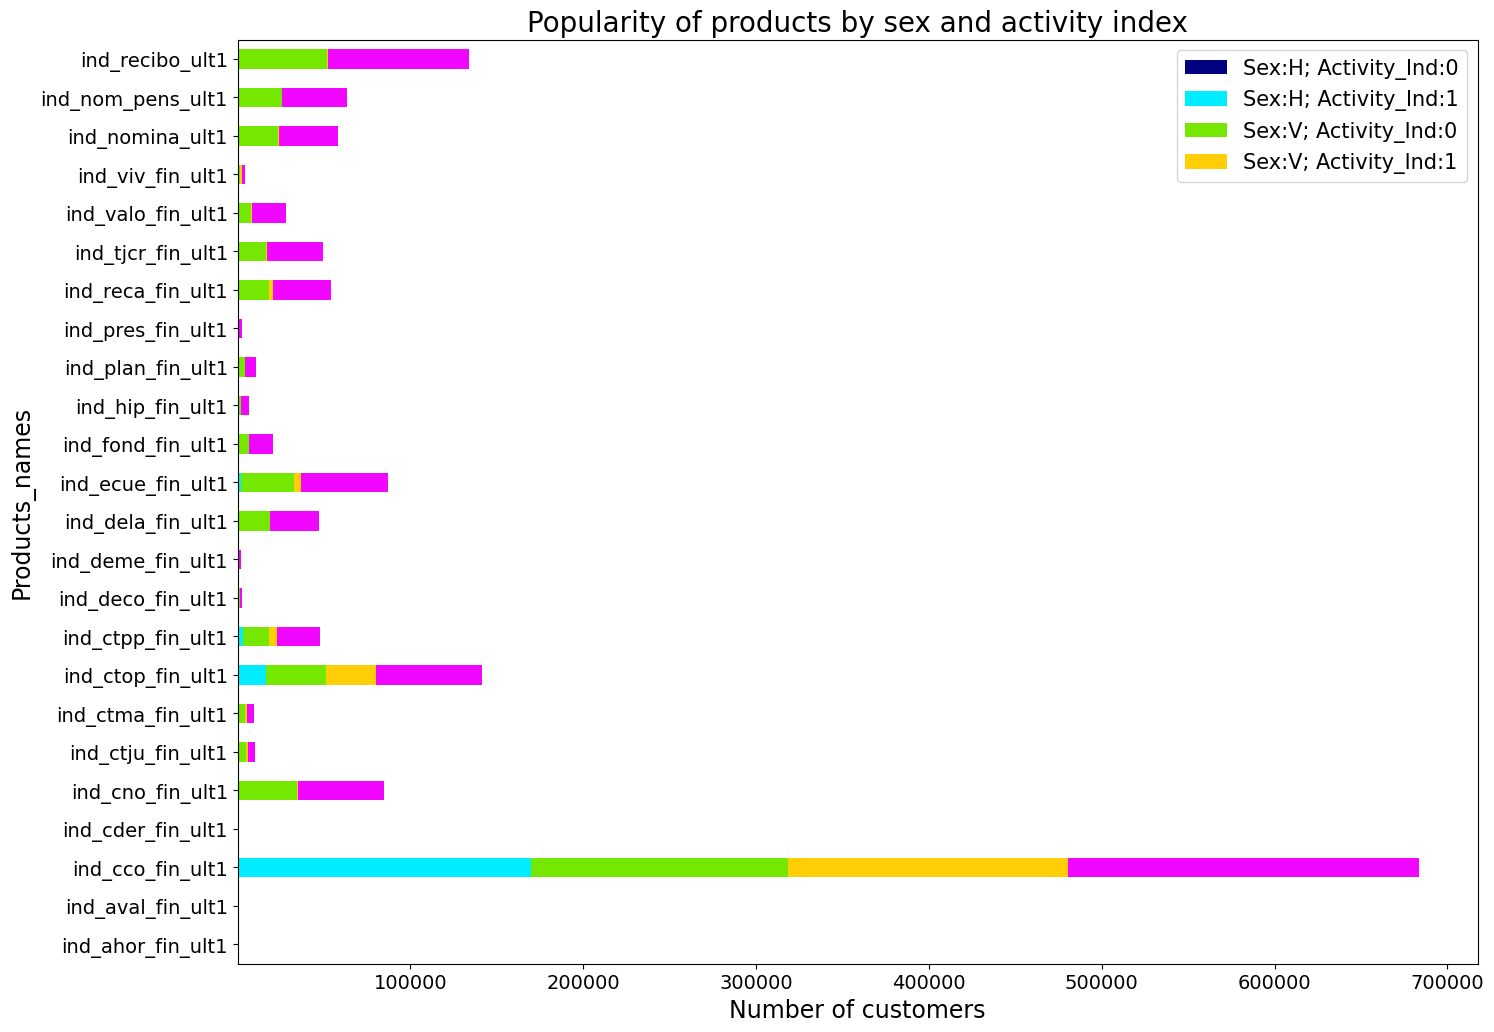

In [58]:
df_a.plot(kind="barh",stacked=True,fontsize=14,figsize=[16,12],colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

In [59]:
#total number of products by age 

df_age=df.groupby(['age'])['total_product'].agg('sum')

In [60]:
df_age.sort_values(ascending=False).head(10)

age
23.0    60270.0
22.0    54331.0
24.0    53683.0
44.0    52915.0
43.0    50362.0
45.0    49898.0
42.0    46937.0
46.0    45382.0
21.0    44627.0
41.0    43848.0
Name: total_product, dtype: float64

Text(0.5, 0, 'age in years')

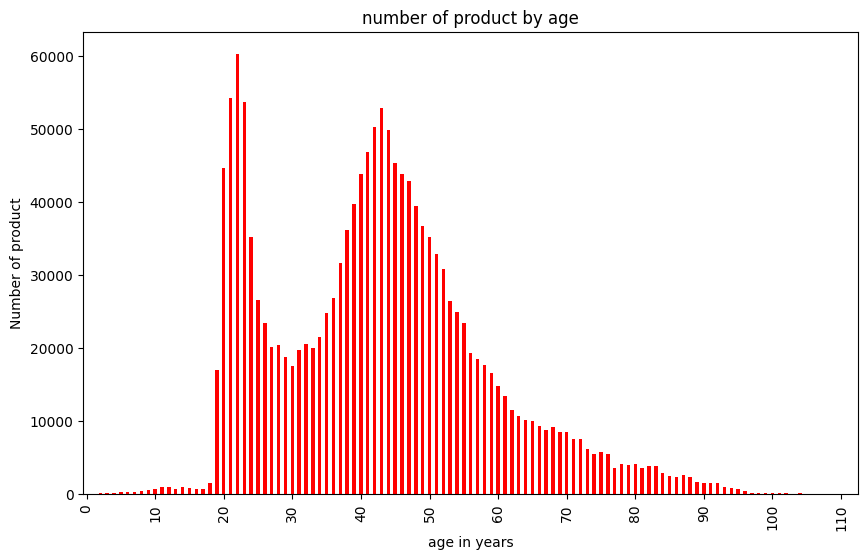

In [61]:
#Number of product by age
df_age.plot(kind='bar',colormap='autumn',legend=None)
plt.xticks(np.arange(0,120,10),[str(x) for x in np.arange(0,120,10)])
plt.title("number of product by age")
plt.ylabel("Number of product")
plt.xlabel('age in years')